# Preprocessing zdjęć do uczenia maszynowego by Piotr Łata

Celem zadania jest utworzenie zdjęcia przygotowanego do dalszego przetwarzania przez sieci neuronowe.

Wyjściem funkcji powinna być zestandaryzowana <b> numpy.array </b> o kształcie <b> (224,224,3)</b>.

Do wizualizacji przebiegu zadania posłużę się zdjęciem "Pies, Kwiatek"

Zdjęcie możemy znaleźć pod adresem :
https://www.tapeciarnia.pl/tapety/normalne/271522_pies_kwiatek.jpg

<img src="https://www.tapeciarnia.pl/tapety/normalne/271522_pies_kwiatek.jpg" alt='Pies, Kwiatek' style="width: 800px;">

Oryginalnie zdjęcie ma rozmiary <b> 2048 x 1224 </b>

Rozpoczniemy od zaimportowania potrzebnych modułów 

In [1]:
# Do pracy ze zdjęciem

import cv2
import urllib
import numpy as np

# Do wyświetlenia wyników

import matplotlib.pyplot as plt
%matplotlib inline

# Do zignorowania logów matplotlib

import logging

Następnie odbierzemy dane spod adresu 

In [2]:
url = 'https://www.tapeciarnia.pl/tapety/normalne/271522_pies_kwiatek.jpg'

Niektóre serwisy nakładają dodatkowe zabezpieczenia, dlatego aby odczytać obraz musimy sfałszować User-Agent'a.

In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
req = urllib.request.Request(url,headers=headers)
content = urllib.request.urlopen(req)

Po takim zabiegu możemy spokojnie odczytać dane z URL

In [4]:
original = np.asarray(bytearray(content.read()), dtype="uint8")
original = cv2.imdecode(original, cv2.IMREAD_COLOR)

OpenCV używa palety BGR a zatem musimy przekonwertować otrzymany obraz na RGB

Jednocześnie skopiujemy (pomoże to w późniejszej wizualizacji) oraz przeskalujemy obraz do potrzebnych nam wymiarów.

In [5]:
xsize , ysize = (224 , 224)
original = cv2.cvtColor(original , cv2.COLOR_BGR2RGB)
img = original.copy()
img = cv2.resize(img,(xsize,ysize), interpolation = cv2.INTER_CUBIC)

Pora sprawdzić kształt naszych danych

In [6]:
print("Shape {} , type {}".format(img.shape,type(img)))

Shape (224, 224, 3) , type <class 'numpy.ndarray'>


Jak widać posiadamy już dane o wymaganym typie oraz kształcie (wymiarach) 

Czas zestandaryzować wartości tablicy

Wykonamy teraz kopię przeskalowanego obrazu:

In [7]:
standarized_img = img.copy()
standarized_img = standarized_img.astype('float32') 

Przy użyciu <b>numpy.mean()</b> oraz <b>numpy.std()</b> standaryzujemy obraz wejściowy.

In [8]:
means = standarized_img.mean()
stds = standarized_img.std()

standarized_img = (standarized_img - means)/stds

Pozostaje już tylko sprawdzić czy standaryzacja przebiegła pomyślnie

In [9]:
print("Before | mean : {0:.6} | std : {1:.4f}".format(img.mean(),img.std()))
print("After  | mean : {0:.4f} | std : {1:.5f}".format(standarized_img.mean(),standarized_img.std()))

Before | mean : 119.314 | std : 46.5834
After  | mean : -0.0000 | std : 1.00000


Jak widać powyżej standaryzacja przebiegła pomyślnie, możemy teraz wyświetlić zdjęcia

W przypadku zestandaryzowangeo zdjęcia matplotlib będzie wyświetlał <b>log</b> 

<div style="color:red; font-size:18px"><br>Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). </div>

Dzieje się tak ponieważ po zestandaryzowaniu posiadamy w tablicy wartości ujemne, naszym zerem staje się średnia, więc oczywistym jest że piksele będą przyjmować również wartości poniżej średniej.

Z uwagi na walory estetyczne pozbędziemy się tego ostrzeżenia korzystając z modułu <b> logging </b> po czym wyświetlimy wyniki.

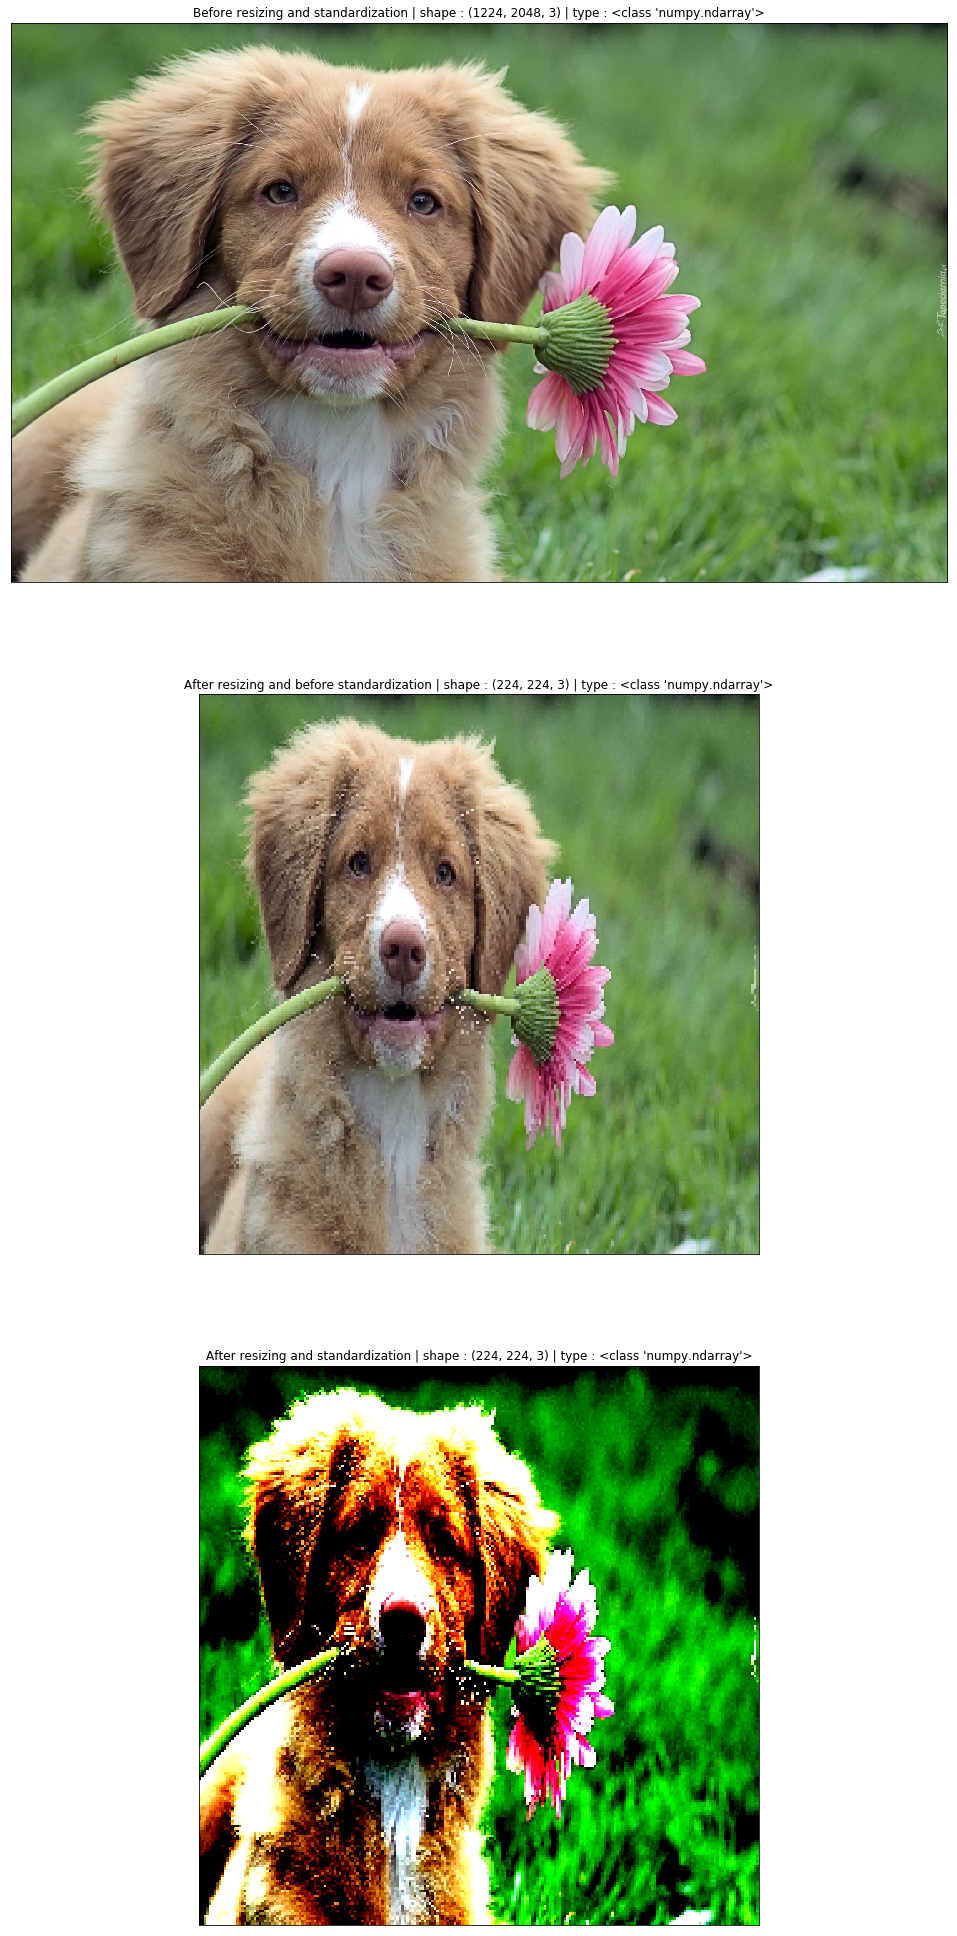

In [10]:
logger = logging.getLogger()
old_level = logger.level
logger.setLevel(100)

plt.figure(figsize=(35,35))

plt.subplot(311)
plt.title("Before resizing and standardization | shape : "+str(original.shape)+" | type : "+str(type(original)))
plt.imshow(original)
plt.xticks([]), plt.yticks([])

plt.subplot(312)
plt.title("After resizing and before standardization | shape : "+str(img.shape)+" | type : "+str(type(img)))
plt.imshow(img)
plt.xticks([]), plt.yticks([])

plt.subplot(313)
plt.title("After resizing and standardization | shape : "+str(standarized_img.shape)+" | type : "+str(type(standarized_img)))
plt.imshow(standarized_img)
plt.xticks([]), plt.yticks([])

plt.show()

logger.setLevel(old_level)


Pozostaje nam już tylko złożyć to wszystko w jedną funkcję która będzie przygotowywała zdjęcia do dalszego przetwarzania.


In [11]:
def preprocess_from_url(url,**kwargs):
    size = kwargs.get('size',(224,224))
    if type(size) is not type((1,1)):
        raise TypeError("Size must be a tuple (X,Y).")
    xsize , ysize = size
    if xsize < 0 or ysize < 0:
        raise ValueError("Size values must be positive.")
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        req = urllib.request.Request(url,headers=headers)
        content = urllib.request.urlopen(req)
        image = np.asarray(bytearray(content.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(xsize,ysize), interpolation = cv2.INTER_CUBIC)
        mn = image.mean()
        sd = image.std()
        image = (image - mn)/sd
        return image
    except:
        raise ValueError("We could not load image file from {}".format(url)) from None

In [12]:
image_url_1 = "https://hugelolcdn.com/i/581592.jpg"
image_url_2 = "http://kennebeccafe.com/wp/wp-content/uploads/2016/03/iris-cycloglossa-1211.jpg"
image_url_3 = "https://i.ytimg.com/vi/2fb-g_V-UT4/hqdefault.jpg"
image_url_4 = "https://mymodernmet.com/wp/wp-content/uploads/2018/04/digital-collage-hybrid-animals-arne-fredriksen-24.jpg"

In [13]:
image1 = preprocess_from_url(image_url_1)
image2 = preprocess_from_url(image_url_2)
image3 = preprocess_from_url(image_url_3)
image4 = preprocess_from_url(image_url_4)

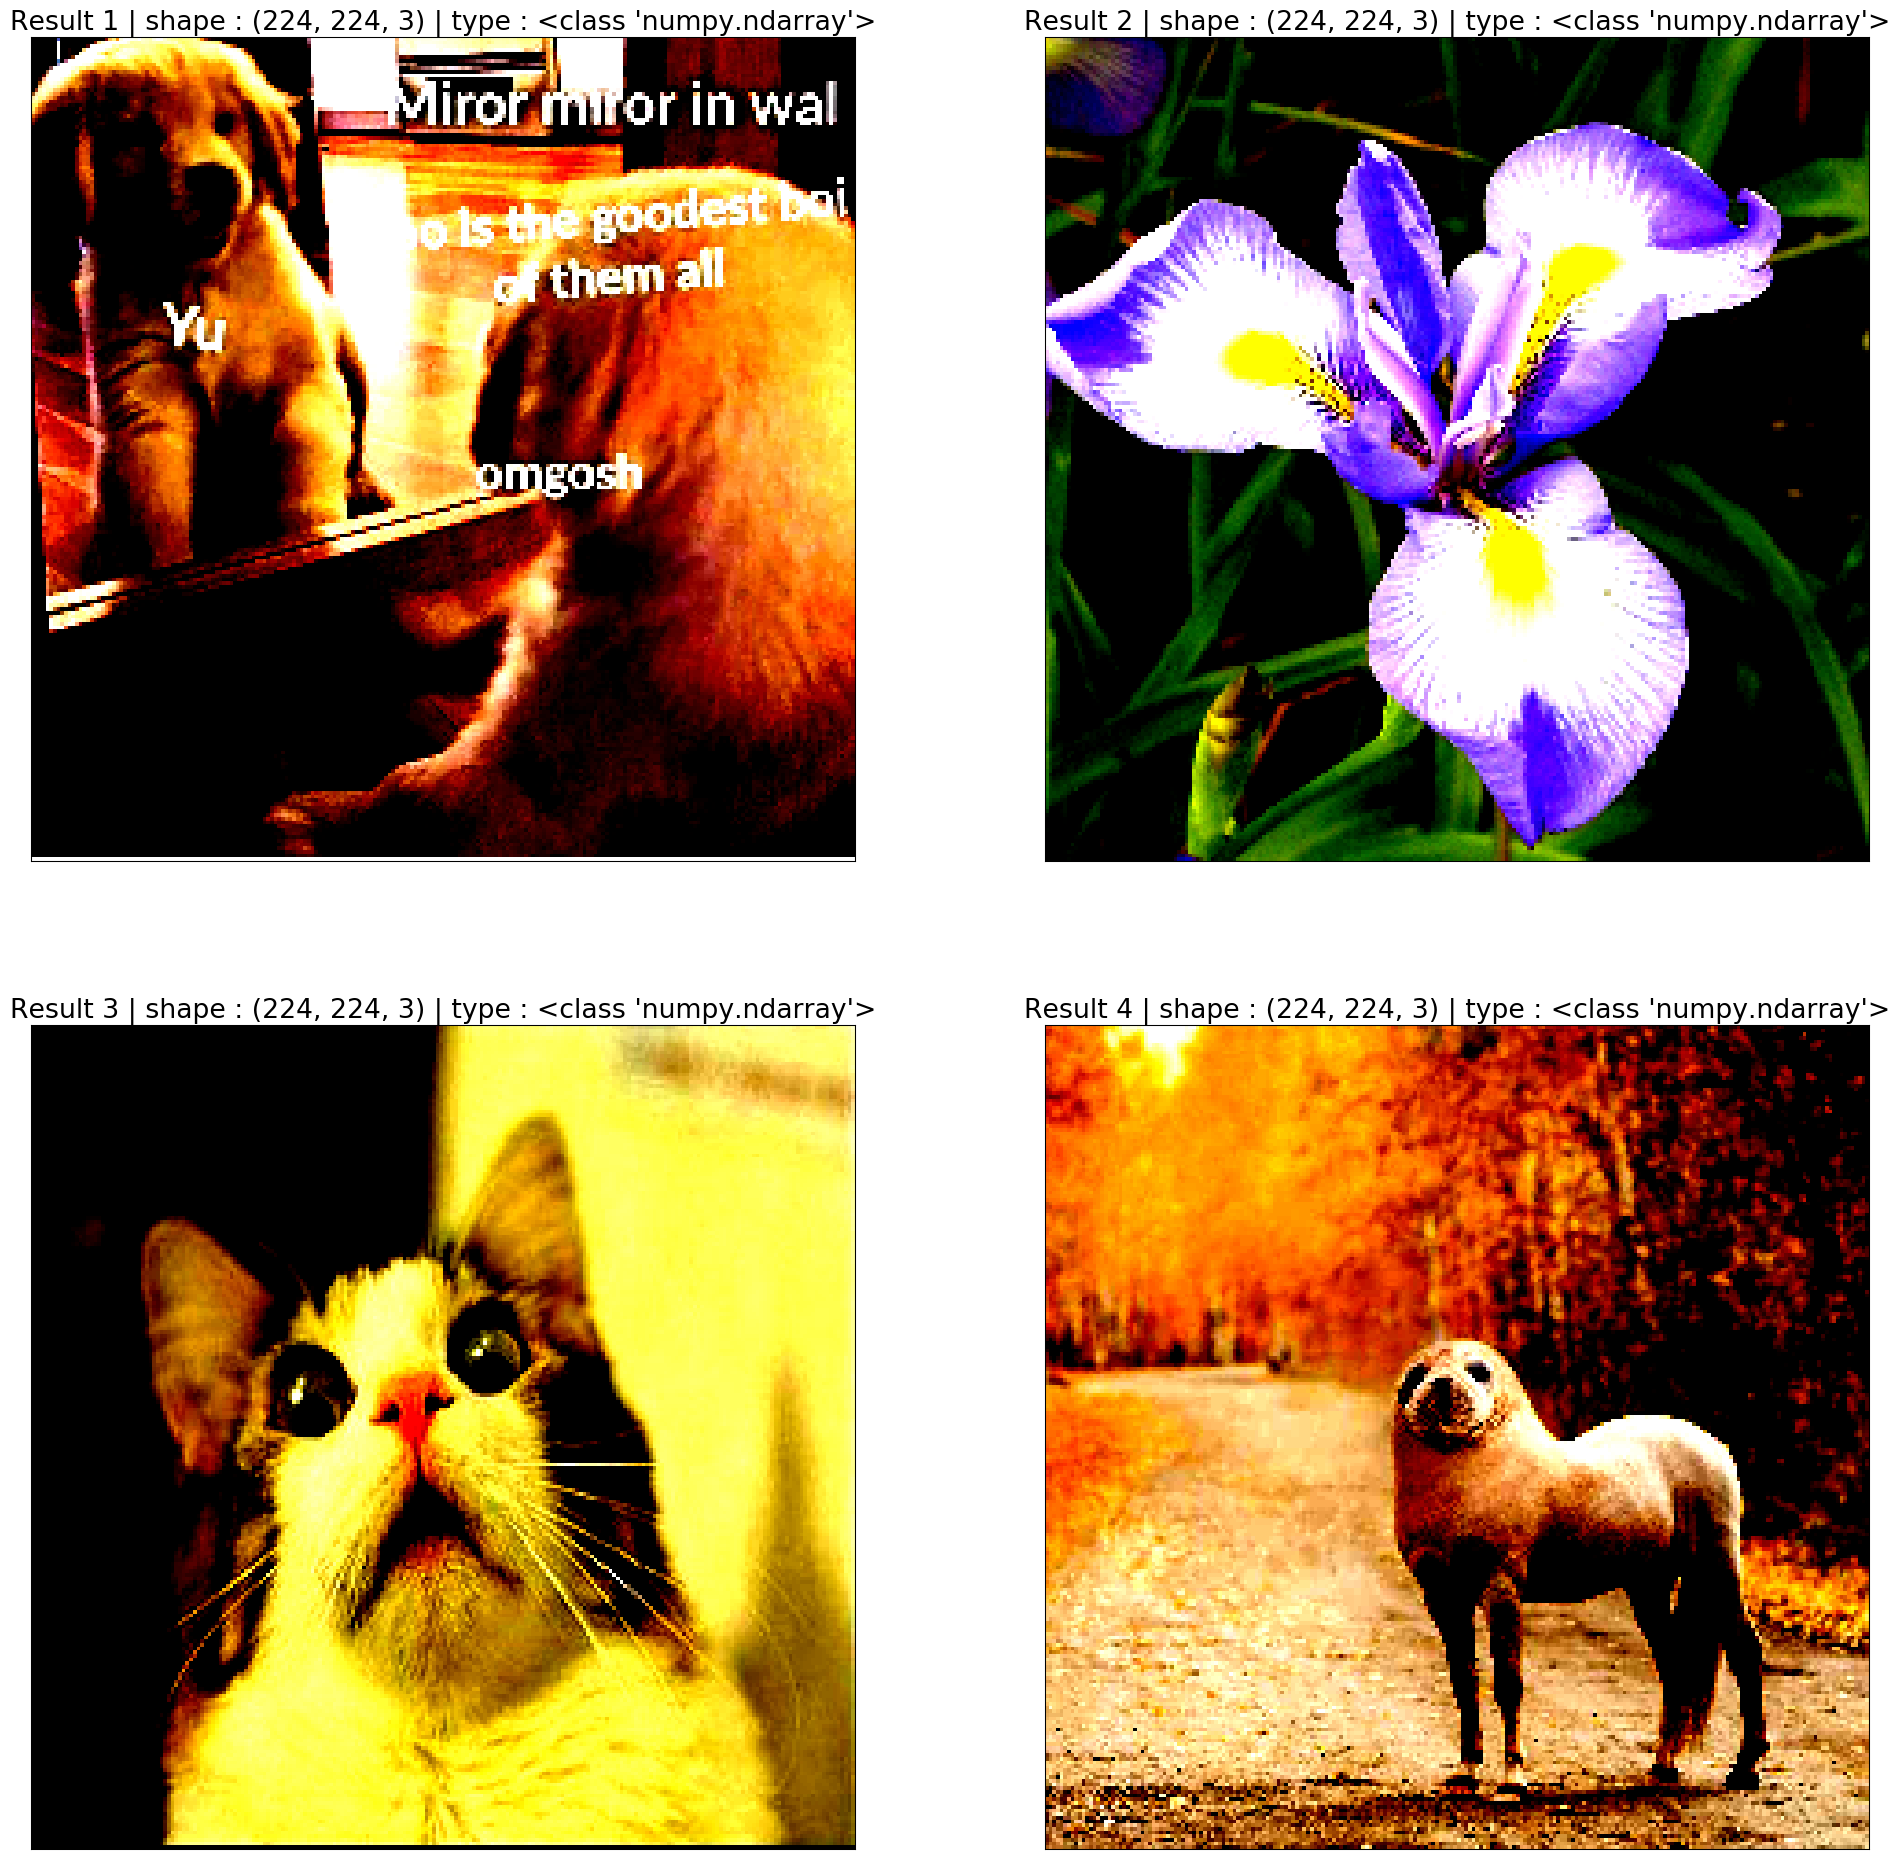

In [14]:
logger = logging.getLogger()
old_level = logger.level
logger.setLevel(100)

plt.figure(figsize=(25,25),dpi=96)

plt.subplot(221)
plt.title("Result 1 | shape : "+str(image1.shape)+" | type : "+str(type(image1)),fontsize=20)
plt.imshow(image1)
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.title("Result 2 | shape : "+str(image2.shape)+" | type : "+str(type(image2)),fontsize=20)
plt.imshow(image2)
plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.title("Result 3 | shape : "+str(image3.shape)+" | type : "+str(type(image3)),fontsize=20)
plt.imshow(image3)
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.title("Result 4 | shape : "+str(image4.shape)+" | type : "+str(type(image4)),fontsize=20)
plt.imshow(image4)
plt.xticks([]), plt.yticks([])

plt.show()

logger.setLevel(old_level)

Poniżej wyniki standaryzacji dla każdego obrazu 

In [15]:
print("Image 1 | mean : {0:.4f} | std : {1:.4f}".format(image1.mean(),image1.std()))
print("Image 2 | mean : {0:.4f} | std : {1:.4f}".format(image2.mean(),image2.std()))
print("Image 3 | mean : {0:.4f} | std : {1:.4f}".format(image3.mean(),image3.std()))
print("Image 4 | mean : {0:.4f} | std : {1:.4f}".format(image4.mean(),image4.std()))

Image 1 | mean : -0.0000 | std : 1.0000
Image 2 | mean : -0.0000 | std : 1.0000
Image 3 | mean : -0.0000 | std : 1.0000
Image 4 | mean : -0.0000 | std : 1.0000


# Dziękuję za uwagę :)